<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-corvus18/blob/main/Semana_8_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semanal 7: Regresiones**

Felipe de Jesus Gastelum Lizarraga - A01114918

Ciencia y analítica de datos (Gpo 10)

Profesora: María de la Paz Rico Fernández

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')

#Renombramiento de Columnas
df.rename(columns={'X1':'Amount_credit','X2':'Gender','X3':'Education','X4':'Marital_status','X5':'Age','Y':'Prob'}, inplace=True)

In [14]:
df = df.dropna()

In [15]:
x = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=0)

print(x_train.shape)
print(y_train.shape)

(25464, 24)
(25464,)


In [22]:
model = LinearRegression()


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)

scores = cross_validate(model,x_train, np.ravel(y_train), cv=cv) #cross_val_predict

print(scores)


{'fit_time': array([0.04703975, 0.0556798 , 0.03814507, 0.02141261, 0.02111435,
       0.02119589, 0.02078462, 0.02123332, 0.02423143, 0.02045441]), 'score_time': array([0.01302338, 0.01161361, 0.00413561, 0.00403285, 0.00383115,
       0.00391054, 0.00384545, 0.00404811, 0.00400424, 0.00396633]), 'test_score': array([0.14041889, 0.11415768, 0.12081067, 0.12374701, 0.12546032,
       0.12513334, 0.12275409, 0.11845674, 0.12538096, 0.13262958])}


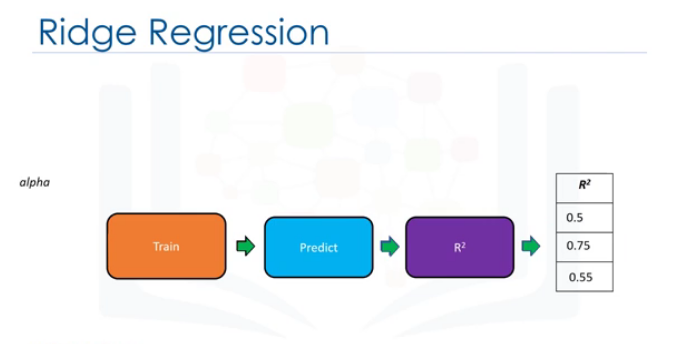

In [50]:
dicc_= {
    'alpha':[1000,1.,0.1,0.01]
  
              }

In [51]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

grid= GridSearchCV(Ridge(), 
                      param_grid=dicc_,
                   
                      cv=cv
                     )
grid.fit(x_train, np.ravel(y_train))

print('score:', grid.best_score_)
print('hiperparámetro:', grid.best_params_)


score: 0.12498174512287759
hiperparámetro: {'alpha': 1.0}
